___
# MINIPROJETO 1

## <font color='red'>Pedro de la Peña</font>
___

## <font color='blue'>Peso (em gramas) dos meteoritos caidos na Terra desde 1700</font>

O modelo original conta com 45700 amostras, contudo, por existirem amostras com o valor muito baixo ou muito alto, os valores trabalhados neste miniprojeto ficaram restritos de 500 a 35000 gramas. Segue link do dataset:  
https://www.datazar.com/file/f43add4cd-8787-493e-b66b-b8a7191910ad

Os valores das amostras utilizadas (excel filtrado) estão na mesma pasta que este arquivo.

___
### Itens 1 a 3 - Resolução:

In [286]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy

In [287]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\Desktop\Mini projeto 1


In [288]:
#peso dos meteoritos que cairam na Terra desde 1700 (em gramas)
dm = pd.read_excel('meteoritemass3.xlsx')

In [289]:
peso = pd.Series(data=sorted(dm.mass))

___
### Itens 4 a 6 - Resolução:

<strong>4)</strong>

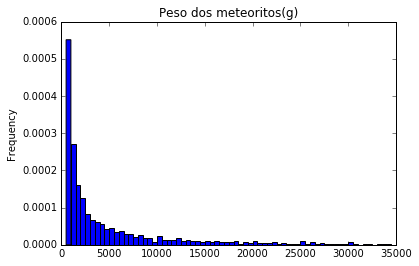

In [290]:
f = np.arange(500,35000,500)

plot=peso.plot.hist(bins=f,normed=True, title="Peso dos meteoritos(g)")


É uma distribuição assimétrica positiva, sendo seus valores variáveis aleatórias contínuas.
Para analisar o histograma, é possivel utilizar a distribuição contínua gama e a distribuição exponencial.

<strong>5)</strong>

## Histograma com valores estimados

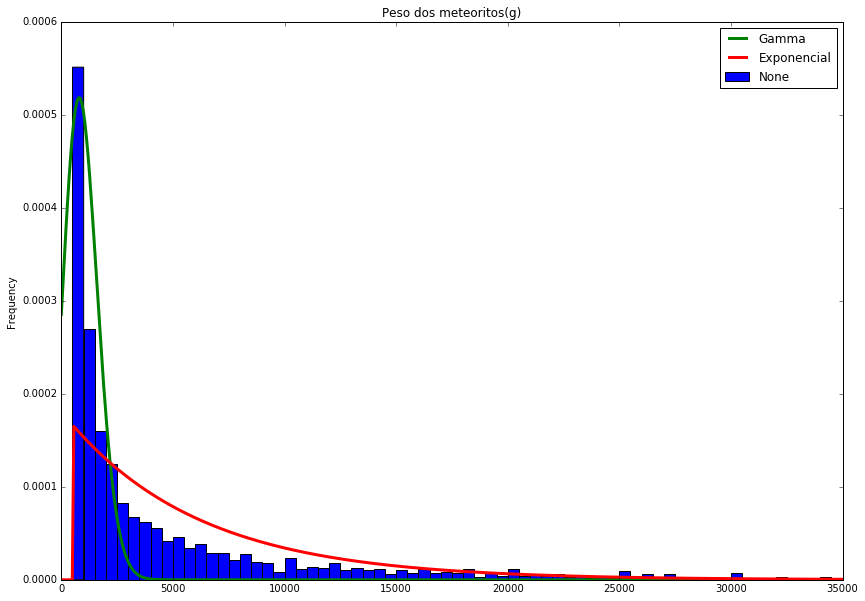

In [291]:
mu_exp1 = 6000

#Valor estimado de gamma
kgamma = 60

#Theta gamma
tgamma = mu_exp1/kgamma

x = np.linspace(0, 35000, 500)

fig = plt.figure(figsize=(14,10))

plot=peso.plot.hist(bins=f,normed=True, title="Peso dos meteoritos(g)")

exponencial = stats.expon.pdf(x, scale=mu_exp1,loc=500)
gamma = stats.gamma.pdf(x, kgamma, -5100, tgamma)


plt.plot(x, gamma, '-', color='green', label="Gamma",lw=3) # Plota a gamma teórica
plt.plot(x, exponencial, '-', color='red', label="Exponencial",lw=3) # Plota a exponencial teórica

plt.legend()

<strong>6)</strong>

## Histograma com valores obtidos pela função fit()

In [292]:
fe = scipy.stats.expon.fit(peso)
fe

(499.99999999999977, 4448.9650709086072)

In [293]:
fg = scipy.stats.gamma.fit(peso)
fg

(0.53898562371893233, 499.99999999999989, 7552.6526451049576)

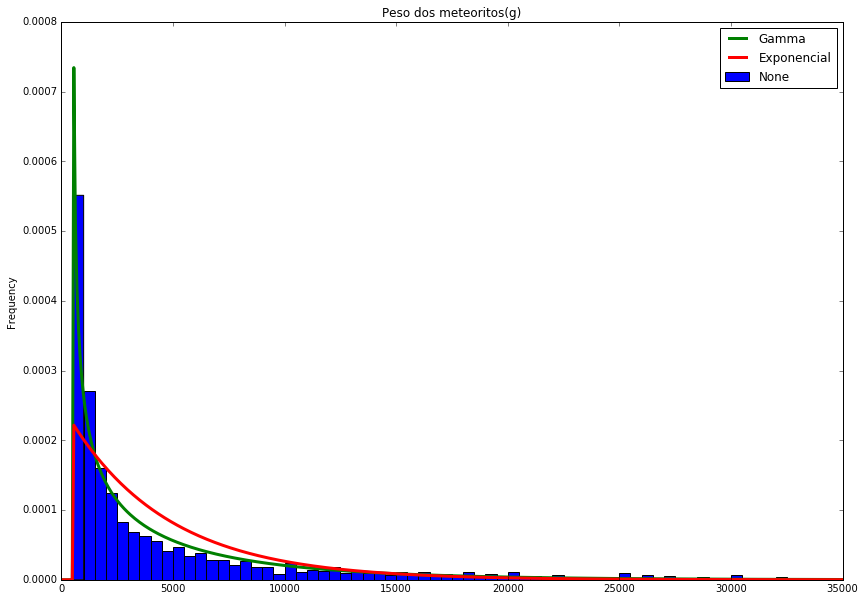

In [294]:
fig = plt.figure(figsize=(14,10))

exponencial2 = stats.expon.pdf(x, 499.99999999999977, 4448.9650709086072)
gamma2 = stats.gamma.pdf(x, 0.53898562371893233, 499.99999999999989, 7552.6526451049576)

plot=peso.plot.hist(bins=f,normed=True, title="Peso dos meteoritos(g)")


plt.plot(x, gamma2, '-', color='green', label="Gamma", lw=3) # Plota a gamma teórica
plt.plot(x, exponencial2, '-', color='red', label="Exponencial", lw=3) # Plota a exponencial teórica

plt.legend()

Comparando as distribuições obtidas com base nas estimativas e utilizando a função <i>fit()</i>, pode-se optar pela e distribuição gamma da obtida pela função, visto que na estimada há probabilidades para valores inexistentes no histograma, enquanto para a obtida na função, começa a ter valores no momento em que o histograma passa a apresentar valores. Já para a distribuição exponencial, ela é idêntica para ambos casos.

___
### Itens 7 a 9 - Resolução:

<strong>7)</strong>

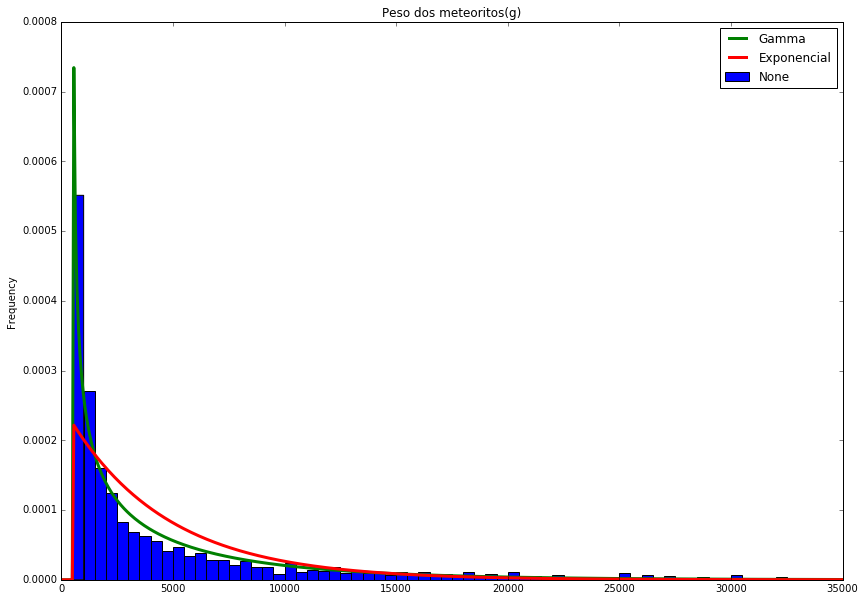

In [295]:
fig = plt.figure(figsize=(14,10))

exponencial2 = stats.expon.pdf(x, 499.99999999999977, 4448.9650709086072)
gamma2 = stats.gamma.pdf(x, 0.53898562371893233, 499.99999999999989, 7552.6526451049576)

plot=peso.plot.hist(bins=f,normed=True, title="Peso dos meteoritos(g)")

plt.plot(x, gamma2, '-', color='green', label="Gamma", lw=3) # Plota a gamma teórica
plt.plot(x, exponencial2, '-', color='red', label="Exponencial", lw=3) # Plota a exponencial teórica

plt.legend()

Comparando as duas distribuições teóricas, pode-se afirmar que a distribuição gamma é a melhor para analisar o histograma, visto que, para os valores de até 10000 gramas, sua curva se aproxima mais dos dados reais em relação a curva da distribuição exponencial.

<strong>8)</strong>

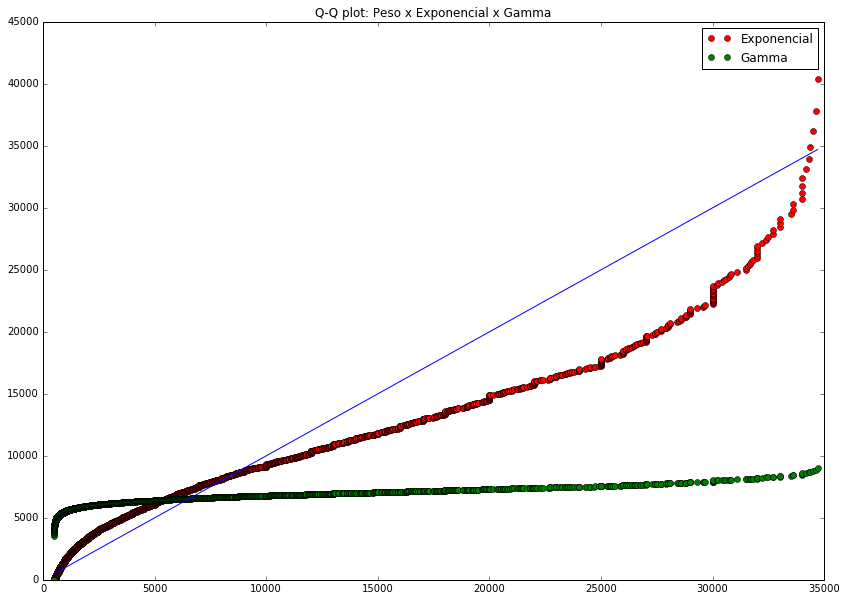

In [296]:
mu_exp = peso.mean()

fra = []
for i in range(len(peso)):
    acc = (i - 0.5) / len(peso)
    if acc < 0:
        acc = 0
    fra.append(acc)

fra = pd.Series(data=fra)

q_exp = stats.expon.ppf(fra, scale=mu_exp)
q_gamma = stats.gamma.ppf(fra, kgamma, loc=0, scale=tgamma)

fig = plt.figure(figsize=(14,10))

plt.title("Q-Q plot: Peso x Exponencial x Gamma")

exp_plot, = plt.plot(peso, q_exp, 'o', color="red", label="Exponencial")
gamma_plot, = plt.plot(peso, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[exp_plot, gamma_plot])
plt.plot((min(peso), max(peso)), (min(peso), max(peso)), '-')

Analisando o Q-Q plot, percebe-se que o modelo exponencial apresenta maior alto de concordância com os valores observados que os valores obtidos no modelo gamma. Logo, a partir deste gráfico, pode-se afirmar que o gráfico exponencial é o mais adequado para analisar o peso dos meteoritos observados.

<strong>9)</strong>

[]

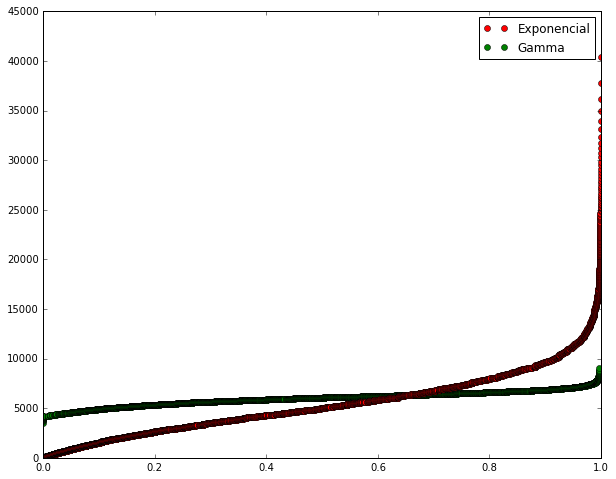

In [315]:
cdf_gamma = stats.gamma.cdf(peso,  0.53898562371893233, 499.99999999999989, 7552.6526451049576)
cdf_exponencial = stats.expon.cdf(peso, 499.99999999999977, 4448.9650709086072)

fig = plt.figure(figsize=(10,8))

gammaa_plot, = plt.plot(cdf_gamma, q_gamma, 'o', label = "Gamma", color ="green")
expp_plot, = plt.plot(cdf_exponencial, q_exp, 'o', label="Exponencial", color="red")
plt.legend(handles=[expp_plot, gamma_plot])

plt.plot()

___
### Itens 10 e 11 - Resolução:

<strong>10)</strong>

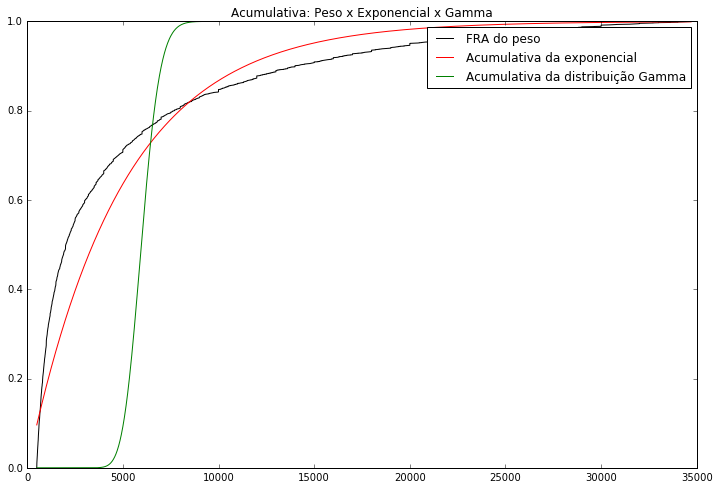

In [297]:
cdf_exponencial = stats.expon.cdf(peso, scale=mu_exp)
cdf_gamma = stats.gamma.cdf(peso, kgamma, 0, tgamma)


fig = plt.figure(figsize=(12,8))

plt.title("Acumulativa: Peso x Exponencial x Gamma")

peso_fra_plot, = plt.plot(peso, fra, '-', color='black', label="FRA do peso")
cdf_exp_plot,   = plt.plot(peso, cdf_exponencial, '-', color='red', label = "Acumulativa da exponencial")
cdf_gamma_plot, = plt.plot(peso, cdf_gamma, '-', color='green', label = "Acumulativa da distribuição Gamma")

plt.legend(handles=[peso_fra_plot, cdf_exp_plot, cdf_gamma_plot])



Pelo gráfico é possivel perceber que, em relação a acumulativa da gamma, a acumulativa da exponencial se aproxima mais do formato da FRA do peso.

<strong>11)</strong> 

In [307]:
#Erro Quadrático CDF
erro_quad_cdf_exponencial = sum((fra - cdf_exponencial)**2)
erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)

print("Erro quadrático da CDF da Exponencial versus F.R.A", erro_quad_cdf_exponencial)
print("Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_gamma)

Erro quadrático da CDF da Exponencial versus F.R.A 94.0970652214
Erro quadrático da CDF da Gamma versus F.R.A 5.55777431989


In [306]:
#Diferenças absolutas
soma_difs_cdf_expoencial = sum( abs(fra - cdf_exponencial))
soma_difs_cdf_gamma = sum( abs(fra - cdf_gamma))

print("Erro da soma do módulo das diferenças da exponencial versus F.R.A: {0} \nErro da soma do módulo das diferenças da gamma versus F.R.A: {1}".format(soma_difs_cdf_expoencial, soma_difs_cdf_gamma))

Erro da soma do módulo das diferenças da exponencial versus F.R.A: 592.2334807529601 
Erro da soma do módulo das diferenças da gamma versus F.R.A: 147.26602207555473


In [285]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_exp = max(abs(fra-cdf_exponencial))
ks_aderencia_gamma = max(abs(fra-cdf_gamma))


print("Teste K-S para a exponencial com μ= {:4.2f}: {:4.3f}\n\
Teste K-S para a gamma com scale={:4.3f}, loc=0 e a={:4.3f}: {:4.3f}".format(mu_exp, ks_aderencia_exp, tgamma, kgamma, ks_aderencia_gamma))

Teste K-S para a exponencial com μ= 4948.96: 0.165
Teste K-S para a gamma com scale=82.483, loc=0 e a=60.000: 0.628


|        Erro        |    Gamma    | Exponencial |
|--------------------|-------------|-------------|
|     Quadrático     |5.55777431989|94.0970652214|
|Diferenças Absolutas|147.26602207555473|592.2334807529601    |
| Kolmogorov-Smirnov |   0.628   |  0.165  |

A partir destes valores, é possivel afirmar que:
Para erros quadráticos e diferenças absolutas, a gamma oferece o melhor ajuste. Já para o teste KS, a melhor aderência é da exponencial.

# Conclusão

A partir de todos os dados analisados, é possivel afirmar que a distribuição gamma é a que mais se adequa ao modelo indicado, pois seu erro quadrático e sua diferença absoluta são menores que os valores da exponencial. Apesar de o Q-Q plot e o Teste KS aparentarem ser mais precisos para a exponencial, o erro quadrático de gamma e suas diferenças absolutas são muito menores que a da exponencial.